# IMPORT LIBRARIES

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import optuna

# IMPORT DATASETS

In [126]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [127]:
train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
4,4,240.0,147.0,70.0,0.600,48.0,6.800,93.0,1410.0,418.00,950.0,586.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0
6398,6398,210.0,110.0,190.0,0.230,47.0,7.900,120.0,1400.0,140.00,800.0,470.0


In [128]:
test_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids
0,6400,93.0,15.9,3.6,0.100,11.90,1.400,12.7,208.0,6.5,156.0
1,6401,180.0,34.0,200.0,1.900,8.20,1.300,300.0,1700.0,210.0,860.0
2,6402,95.0,44.0,35.0,0.081,3.30,1.100,28.0,390.0,22.0,240.0
3,6403,110.0,29.0,12.0,0.250,6.00,0.150,23.0,283.0,15.0,190.0
4,6404,179.0,59.0,51.7,0.160,45.00,4.100,64.0,976.0,170.0,430.0
...,...,...,...,...,...,...,...,...,...,...,...
1596,7996,88.0,30.0,11.0,0.170,3.20,1.217,24.0,289.0,22.0,140.0
1597,7997,64.0,21.0,18.0,0.050,0.68,4.700,31.0,327.0,28.0,160.0
1598,7998,210.0,32.0,53.0,0.150,24.00,0.120,68.0,570.0,25.0,670.0
1599,7999,230.0,82.0,14.0,0.100,9.00,2.000,19.0,580.0,24.0,310.0


# DATA PREP

In [129]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      6400 non-null   int64  
 1   Alkalinity, total       6400 non-null   float64
 2   Calcium                 6400 non-null   float64
 3   Chloride                6400 non-null   float64
 4   Fluoride                6400 non-null   float64
 5   Magnesium               6400 non-null   float64
 6   Nitrate as N            6400 non-null   float64
 7   Sodium                  6400 non-null   float64
 8   Specific Conductivity   6400 non-null   float64
 9   Sulfate                 6400 non-null   float64
 10  Total Dissolved Solids  6400 non-null   float64
 11  Hardness                6400 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 600.1 KB


In [130]:
train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000,6400.000000
mean,3199.500000,167.151047,69.350432,53.213620,0.333625,23.446335,3.382707,62.437731,637.631953,71.645934,409.570669,216.148203
std,1847.665193,83.157803,1052.136452,92.934505,0.452473,325.389503,4.878279,556.891904,597.297274,108.414049,302.958442,161.431526
min,0.000000,12.000000,0.610000,0.580000,0.049000,0.051000,0.002300,1.300000,40.000000,0.140000,19.580000,2.500000
25%,1599.750000,110.000000,25.000000,11.000000,0.140000,7.300000,0.850000,21.000000,340.000000,13.000000,220.000000,101.000000
50%,3199.500000,153.500000,45.000000,28.000000,0.210000,14.000000,2.000000,35.000000,520.000000,33.000000,320.000000,180.000000
75%,4799.250000,209.000000,72.000000,62.000000,0.382250,25.000000,4.300000,60.000000,800.000000,85.000000,500.000000,281.000000
max,6399.000000,1000.000000,83000.000000,2100.000000,9.000000,26000.000000,106.000000,32000.000000,31400.000000,2000.000000,4100.000000,1901.000000


## Handle Null Values

In [131]:
train_df.isnull().sum()

id                        0
Alkalinity, total         0
Calcium                   0
Chloride                  0
Fluoride                  0
Magnesium                 0
Nitrate as N              0
Sodium                    0
Specific Conductivity     0
Sulfate                   0
Total Dissolved Solids    0
Hardness                  0
dtype: int64

## Handle Outlier

In [132]:
def percentage_outliers_iqr(df):
    outliers_percentage = {}
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
        total = len(df[column])
        percentage = (outliers / total) * 100
        outliers_percentage[column] = percentage
    return outliers_percentage


In [133]:
outliers_percentage = percentage_outliers_iqr(train_df)

In [134]:
def removeOutlier(df, col):
    kuartil1 = col.quantile(0.25)
    kuartil3 = col.quantile(0.75)
    IQR = kuartil3 - kuartil1
    lower_bound = kuartil1 - 1.5 * IQR
    upper_bound = kuartil3 + 1.5 * IQR
    df = df[(col >= lower_bound) & (col <= upper_bound)]
    return df

In [135]:
clean_train_df = train_df.copy()

outliers_percentage = percentage_outliers_iqr(clean_train_df)

for col in clean_train_df.columns:
    if col != "id" and clean_train_df[col].dtypes != object:
        if outliers_percentage[col] > 5:
            clean_train_df[col] = np.log1p(clean_train_df[col])
        else:
            clean_train_df = removeOutlier(clean_train_df, clean_train_df[col])
        

In [136]:
clean_train_df

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
0,0,120.0,24.0,6.9,0.314,7.1,0.498,48.0,510.0,23.20,240.0,90.4
1,1,140.0,41.0,11.0,0.150,6.5,0.950,19.0,300.0,8.50,190.0,130.0
2,2,160.0,51.0,9.0,0.450,9.1,2.500,12.0,370.0,25.00,230.0,160.0
3,3,46.0,13.0,2.9,0.120,2.7,0.430,6.4,110.0,5.00,97.0,41.0
5,5,154.0,49.2,51.0,0.250,10.6,0.550,51.7,619.0,100.00,338.0,198.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6393,6393,115.0,27.9,14.9,0.100,9.2,2.900,21.0,292.0,4.10,217.0,113.0
6395,6395,180.0,58.0,40.0,0.180,25.0,3.600,22.0,540.0,48.00,400.0,219.0
6396,6396,44.0,5.7,3.0,0.120,3.7,0.470,5.9,100.0,0.85,56.0,30.0
6397,6397,138.0,40.3,28.4,0.100,14.2,8.600,31.0,438.0,17.70,300.0,159.0


In [137]:
clean_train_df.describe()

,id,"Alkalinity, total",Calcium,Chloride,Fluoride,Magnesium,Nitrate as N,Sodium,Specific Conductivity,Sulfate,Total Dissolved Solids,Hardness
count,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000,4008.000000
mean,3241.924651,140.321756,37.859695,24.904249,0.236716,12.372500,2.419500,29.835502,418.109681,26.759433,268.331512,146.307090
std,1852.578051,55.875254,21.440715,22.789954,0.151052,8.459773,2.029828,17.349778,173.895078,23.871648,100.126877,75.401858
min,0.000000,21.600000,1.000000,0.580000,0.050000,0.054000,0.002300,1.300000,48.200000,0.140000,36.000000,3.500000
25%,1641.250000,98.000000,21.000000,8.100000,0.120000,6.000000,0.810000,17.000000,286.750000,8.200000,190.000000,86.475000
50%,3255.500000,131.000000,34.000000,17.000000,0.189500,11.000000,1.800000,25.000000,390.000000,19.000000,257.500000,132.000000
75%,4851.000000,180.000000,52.000000,35.000000,0.300000,17.000000,3.600000,39.000000,540.000000,38.025000,332.500000,200.000000
max,6399.000000,348.000000,138.000000,124.000000,0.730000,42.000000,8.970000,91.000000,980.000000,107.000000,560.000000,363.000000


### Histogram

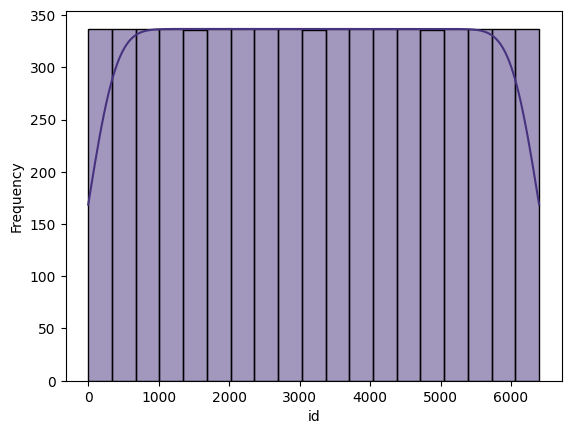

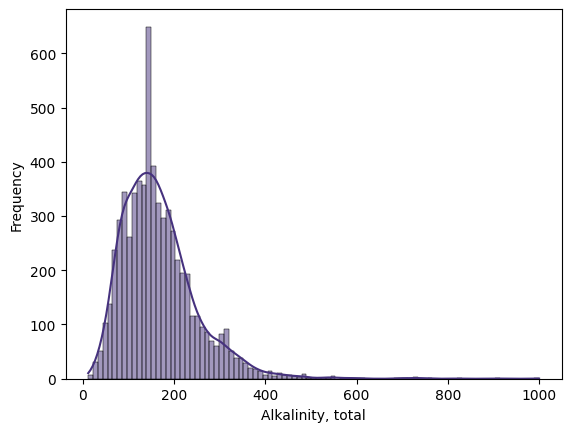

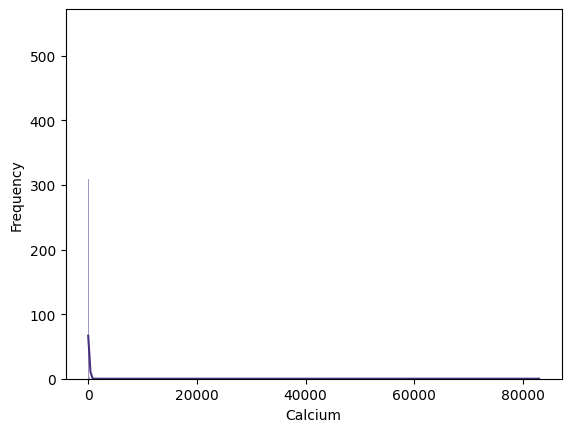

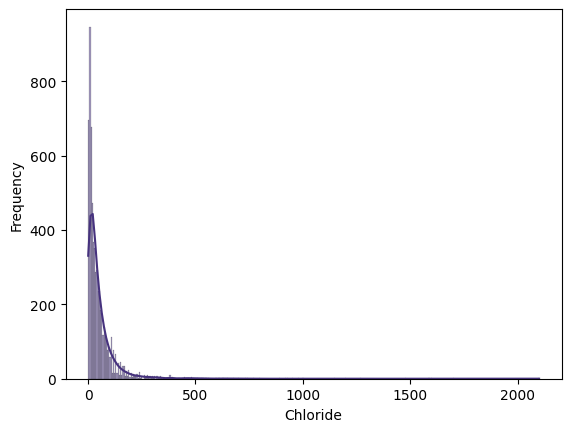

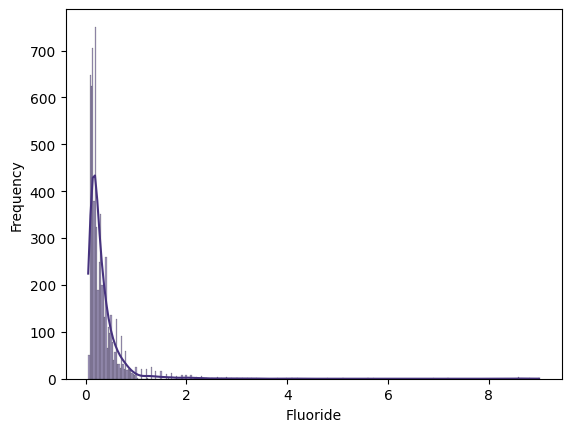

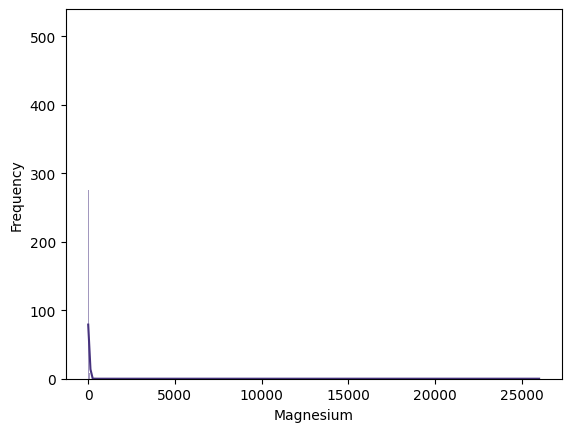

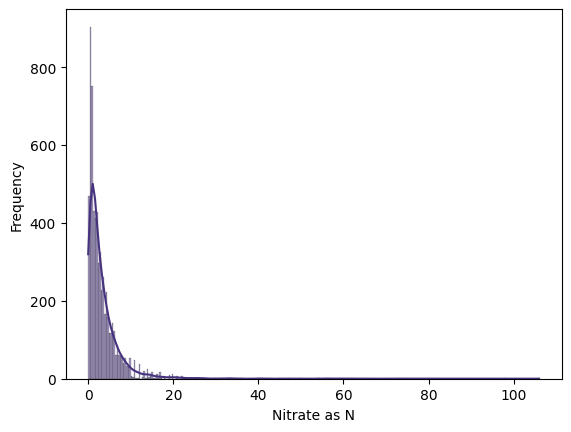

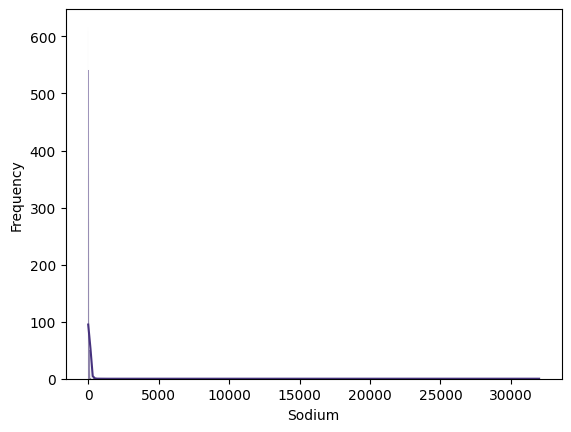

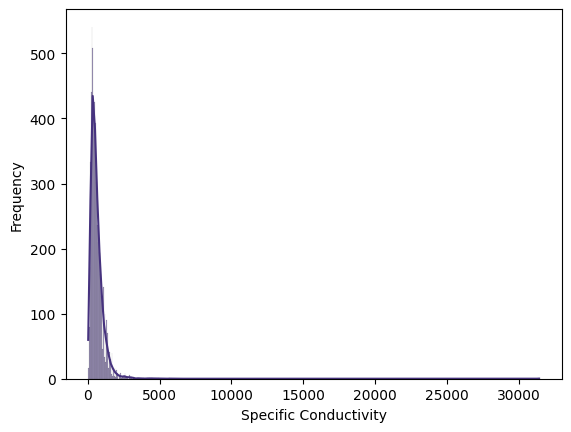

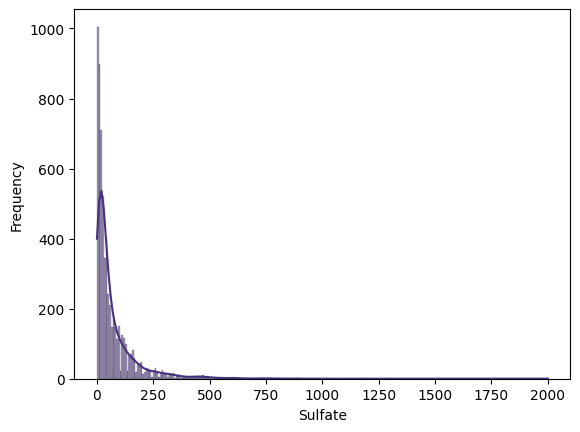

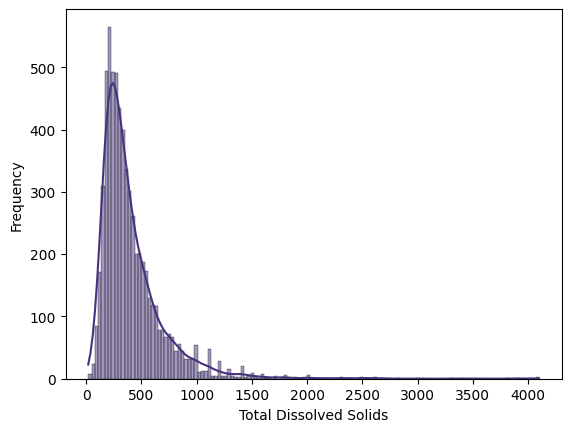

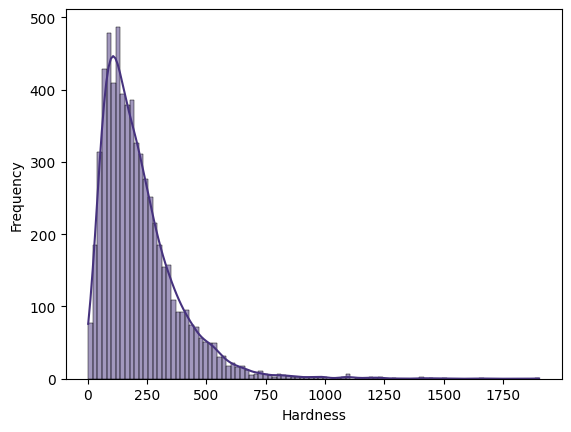

In [138]:
for col in train_df:
    plt.figure()
    sns.histplot(train_df[col], color=sns.color_palette("viridis")[0], kde=True) 
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### Boxplot

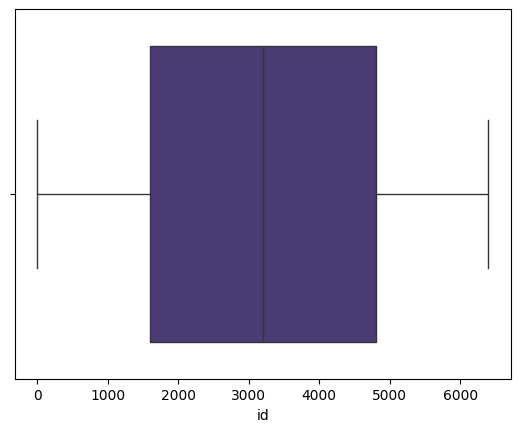

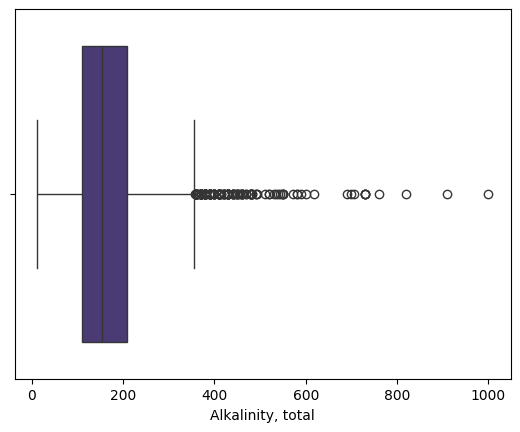

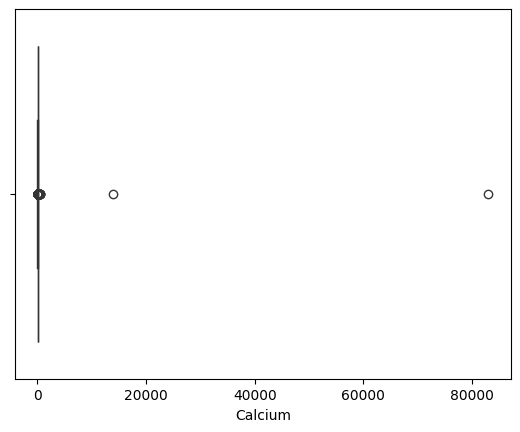

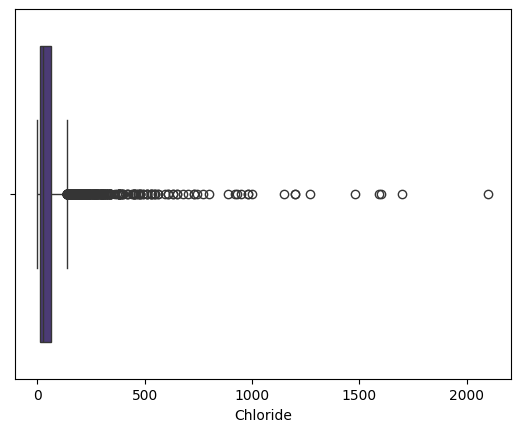

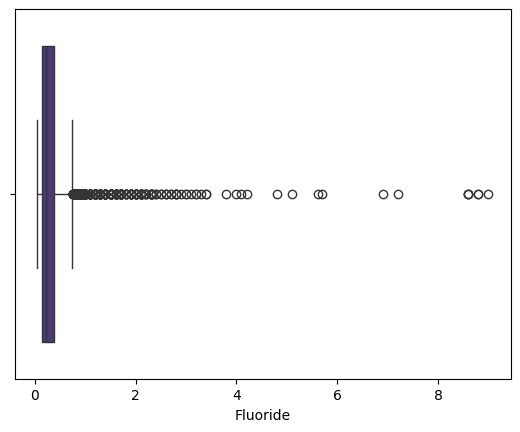

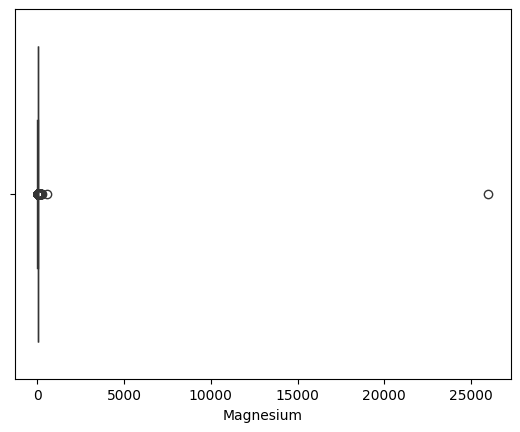

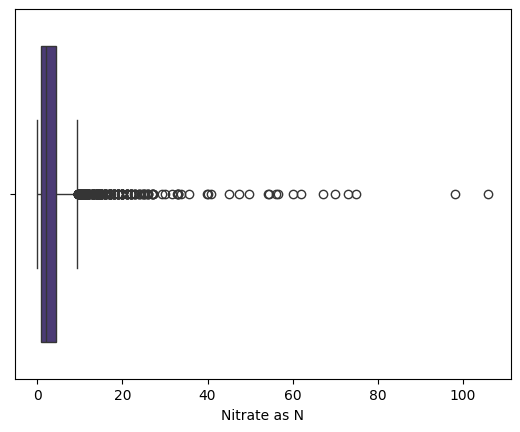

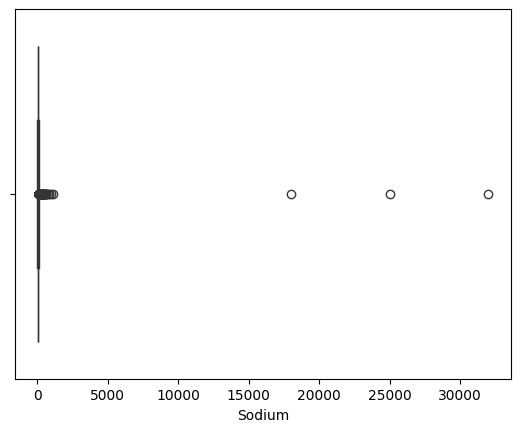

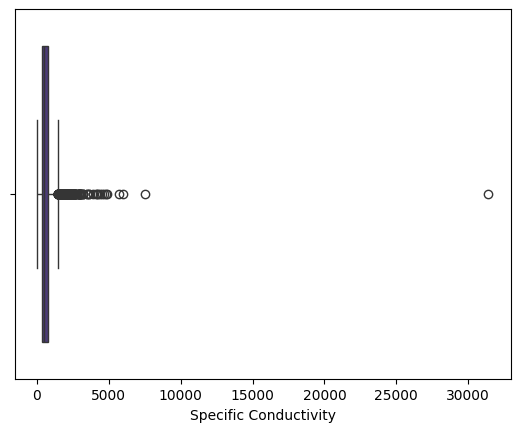

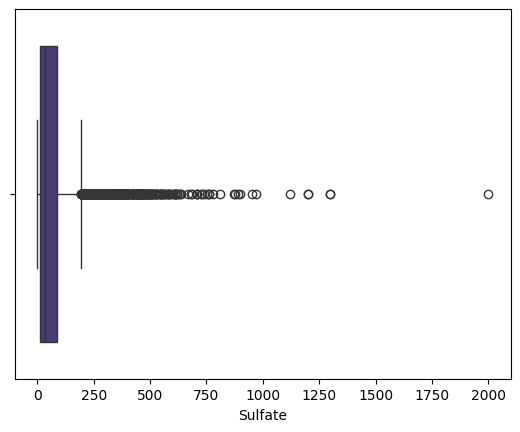

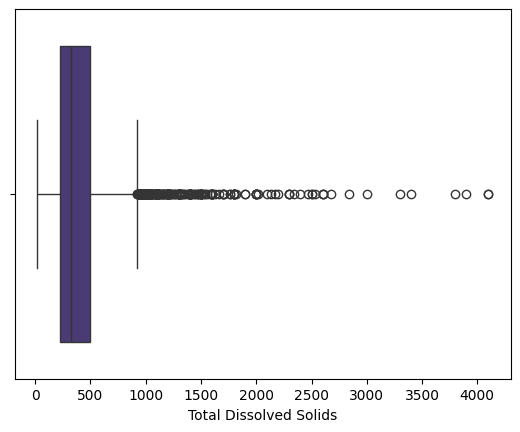

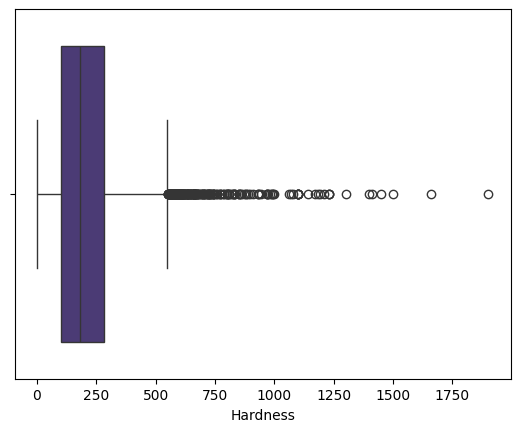

In [139]:
for col in train_df:
    plt.figure()
    sns.boxplot(train_df[col], color=sns.color_palette("viridis")[0], orient="h") 
    plt.xlabel(col)
    plt.show()

# FEATURE ENGINEERING

## LABEL CORRELATION

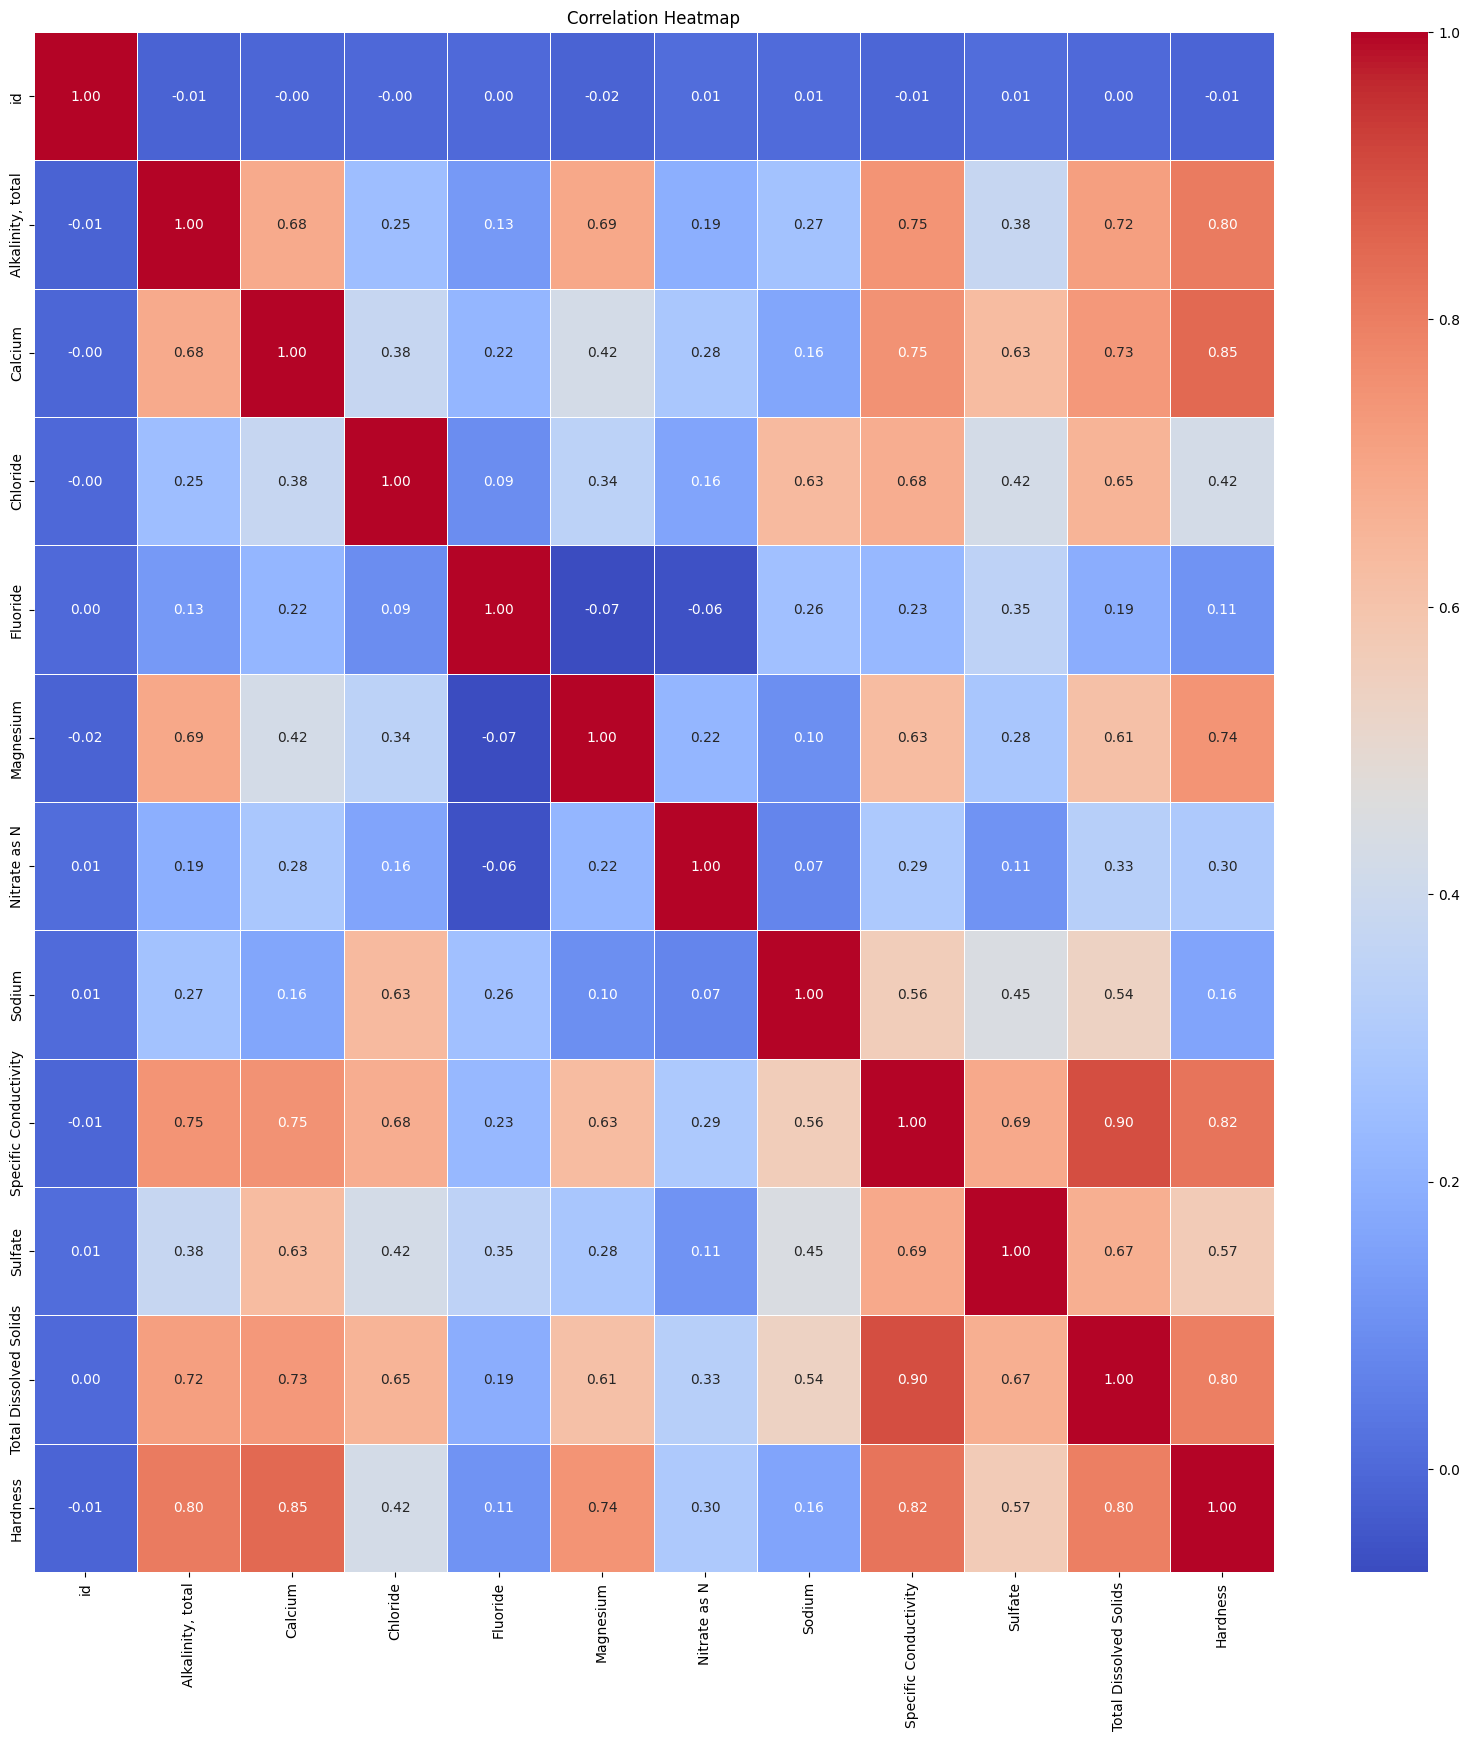

In [140]:
# Calculate the correlation matrix
correlation_matrix = clean_train_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# MODEL CREATION